# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [214]:
# Import necessary libraries
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('ggplot')

import seaborn as sns

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score, f1_score

# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

## Data Overview

- Observations
- Sanity checks

In [215]:
data = pd.read_csv('ExtraaLearn.csv')
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observaciones:** Podemos ver que no hay valores nulos, tenemos 4612 rows y 15 columnas theres no missing values

In [217]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [218]:
data.duplicated().sum()

0

**Observations:** There's no duplicates and no missing values. 

In [219]:
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

**obs** rango de edad de 46 años no se repite ningun ID, la mayoria son categorical columns

## For safety, we are going to create a copy of the original data frame

In [220]:
df = data.copy()
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


### Lets drop the ID column as is an unique value and it will not add any value to our analysis 

In [221]:
df = df.drop('ID', axis=1)
df

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


### Renaming the columns for better understandaility

In [222]:
df.rename(columns={'print_media_type1': 'newspaper', 'print_media_type2': 'magazine'}, inplace=True)
df

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,newspaper,magazine,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


In [223]:
num_cols = ['age','website_visits','time_spent_on_website','page_views_per_visit']
cat_cols = ['current_occupation','first_interaction','profile_completed','last_activity','newspaper',
            'magazine','digital_media','educational_channels','referral','status']

In [224]:
for col in cat_cols:
    print(df[col].value_counts(1)*100)
    print("-" * 50)

current_occupation
Professional    56.721596
Unemployed      31.244579
Student         12.033825
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website       55.117086
Mobile App    44.882914
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High      49.089332
Medium    48.590633
Low        2.320035
Name: proportion, dtype: float64
--------------------------------------------------
last_activity
Email Activity      49.392888
Phone Activity      26.756288
Website Activity    23.850824
Name: proportion, dtype: float64
--------------------------------------------------
newspaper
No     89.223764
Yes    10.776236
Name: proportion, dtype: float64
--------------------------------------------------
magazine
No     94.947962
Yes     5.052038
Name: proportion, dtype: float64
--------------------------------------------------
digital_media
No     88.573287
Yes    11.426713
Name: proportion

**Observations:** More than 50% are employed, more than 97% of them have their profile at least medium completed, The most popular acquisition channel is educational channels, after that is digital media and newspaper, finally magazine, almost no referrals and almost 30% of the leads actually convert to paid we see an imbalance, the model has incentives to predict no's, so we will need to factor in the inbalance.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [225]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = df, x = feature, ax = ax_box2, showmeans = True, color = "pink"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = df, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = df, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

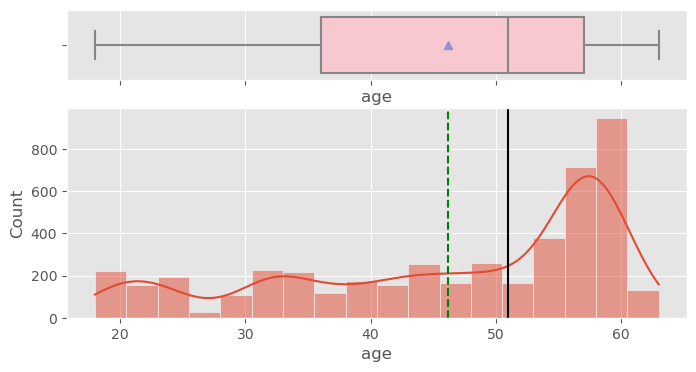

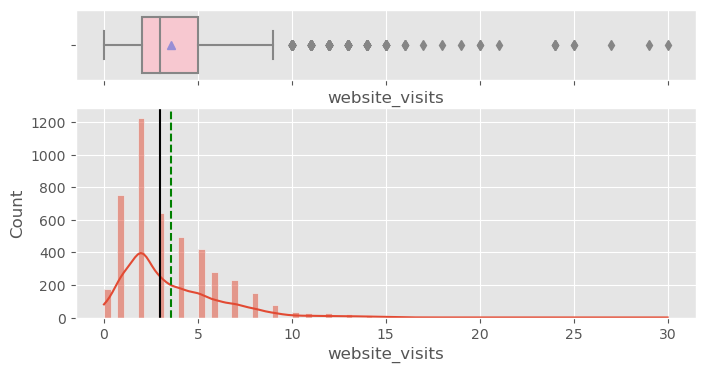

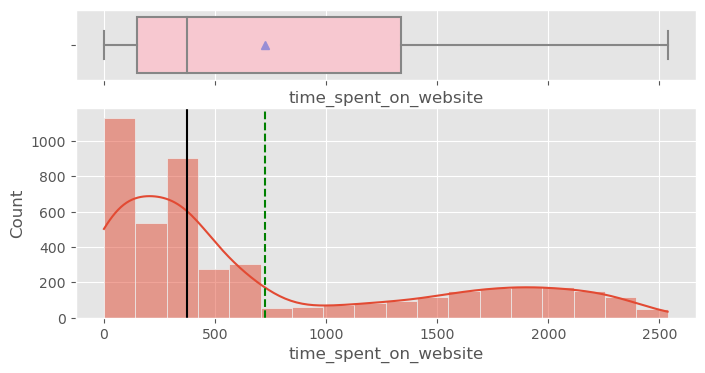

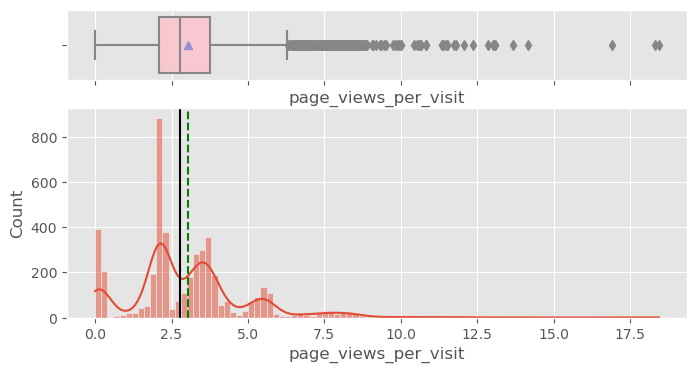

In [226]:
for col_name in num_cols:
    histogram_boxplot(df, col_name, figsize= (8,4), kde=True, bins=None)

**Observations:** Average age is 46 years old, most of the lead are between 50 - 60 years old, average website visits is around 3 with a lot of outliers, the average time spent on the website is around 400 with a lot of leads spending more than a 1000, also right skewed with the average and mean being pretty close, around 2.5, has outliers. 

In [227]:
corr = df[num_cols].corr()

<Axes: >

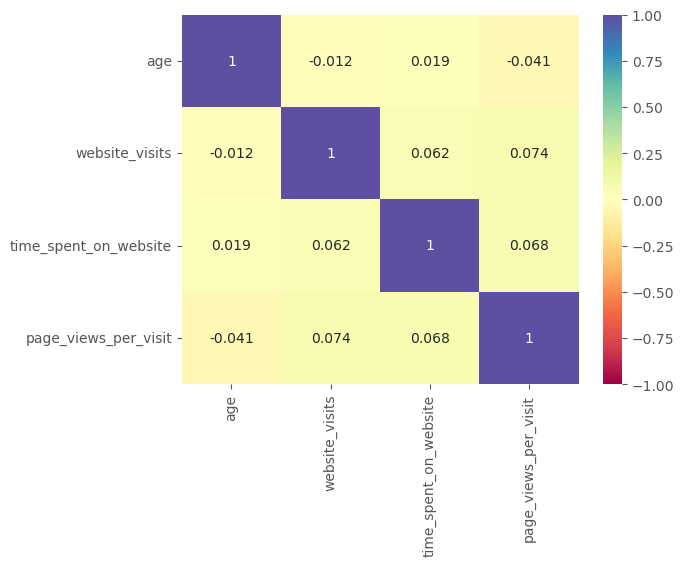

In [228]:
sns.heatmap(corr, annot =True, cmap = 'Spectral', vmin = -1, vmax= 1)

**Observations:** No significant correlations between num variables.

In [229]:
def stacked_barplot(df, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = df[predictor].nunique()
    sorter = df[target].value_counts().index[-1]
    tab1 = pd.crosstab(df[predictor], df[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df[predictor], df[target], normalize = "index").sort_values(
        by = sorter, ascending = True
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

### Find out how current occupation affects lead status.

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


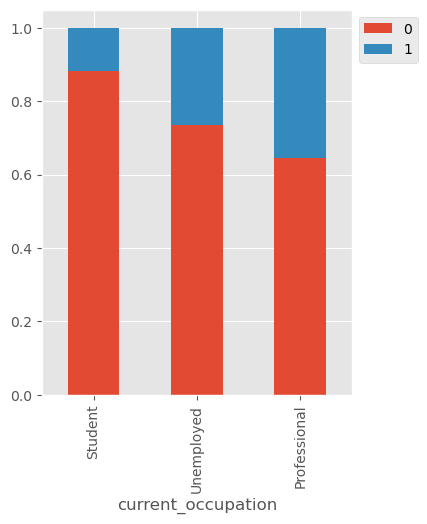

In [230]:
stacked_barplot(df,'current_occupation','status' )

**Observations:** It seems that most leads that converted to paid customers are professionals, after that the unemployed leads and the least amount is the students. 

### Do the first channels of interaction have an impact on the lead status?

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


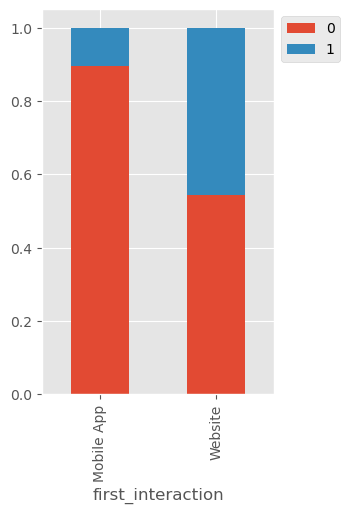

In [231]:
stacked_barplot(df,'first_interaction','status' )

**Observations:** It seems like the most effective first interaction is the website, having the almost 46% of converted leads. 

### Which way of interaction works best?

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


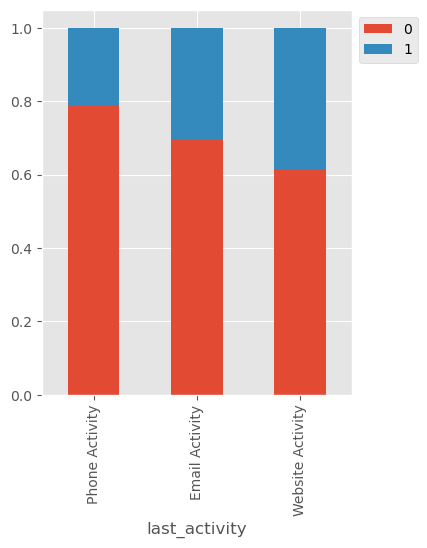

In [232]:
stacked_barplot(df,'last_activity','status' )

**Observations:** It seems like the website interacion works best and its more likely to convert the customers to paid.

### People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


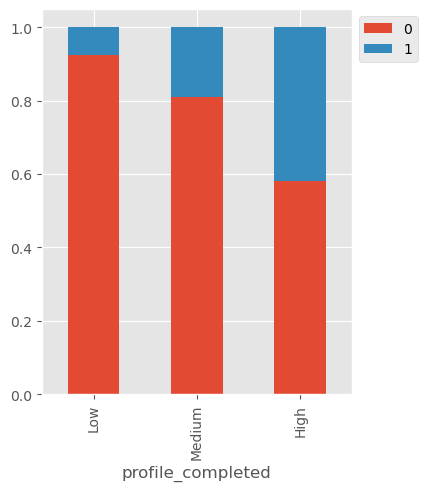

In [233]:
stacked_barplot(df,'profile_completed','status' )

**Observations:** It seems like the higer the leads have their profile completed, the more likely that they convert to paid users. 

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [234]:

df = pd.get_dummies(
    df, 
    columns = df.select_dtypes(include = ['object']).columns.tolist(),
    drop_first = True,
    dtype=int
)
df.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,newspaper_Yes,magazine_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.861,1,0,1,1,0,0,0,1,1,0,1,0,0
1,56,2,83,0.320,0,0,0,0,0,1,0,1,0,0,0,1,0
2,52,3,330,0.074,0,0,0,1,0,1,0,1,0,0,1,0,0
3,53,4,464,2.057,1,0,1,1,0,0,0,1,0,0,0,0,0
4,23,4,600,16.914,0,1,0,1,0,0,0,0,0,0,0,0,0


In [235]:
x = df.drop('status', axis=1)
y = df['status']

In [236]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, shuffle=True, random_state=1, stratify = y)

In [237]:
# Creating metric function

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [238]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

## Building a Decision Tree model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



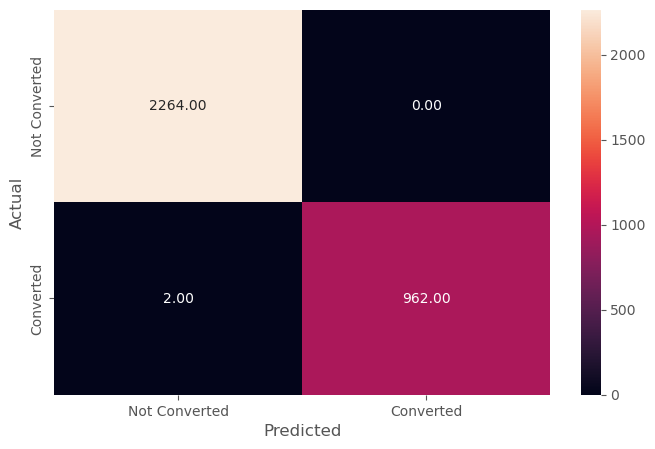

In [239]:
dt = DecisionTreeClassifier(class_weight = {0:0.7, 1:0.3},random_state=1);
dt.fit(x_train, y_train)
y_train_pred_dt = dt.predict(x_train)
metrics_score(y_train, y_train_pred_dt)

**Observation:**

- The Decision tree is giving a **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       971
           1       0.65      0.68      0.67       413

    accuracy                           0.80      1384
   macro avg       0.76      0.76      0.76      1384
weighted avg       0.80      0.80      0.80      1384



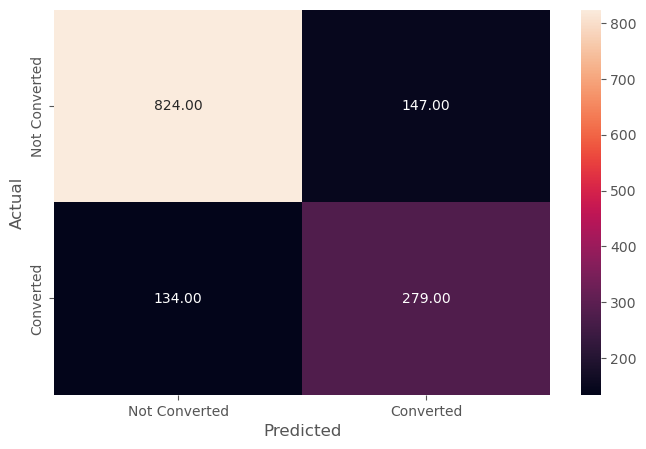

In [240]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**
- The tree seems to be overfitting the data as the recall is 0.76 on the test data but 1 on the training data. 


## Model Performance evaluation and improvement

In [241]:
dtree_test = model_performance_classification(dt,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.757527,0.762077,0.796965


In [242]:
features = list(x.columns)

## Lets visualize the decision tree

In [243]:
dt_classifier_visualize = DecisionTreeClassifier(random_state=1, max_depth = 4)
dt_classifier_visualize.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

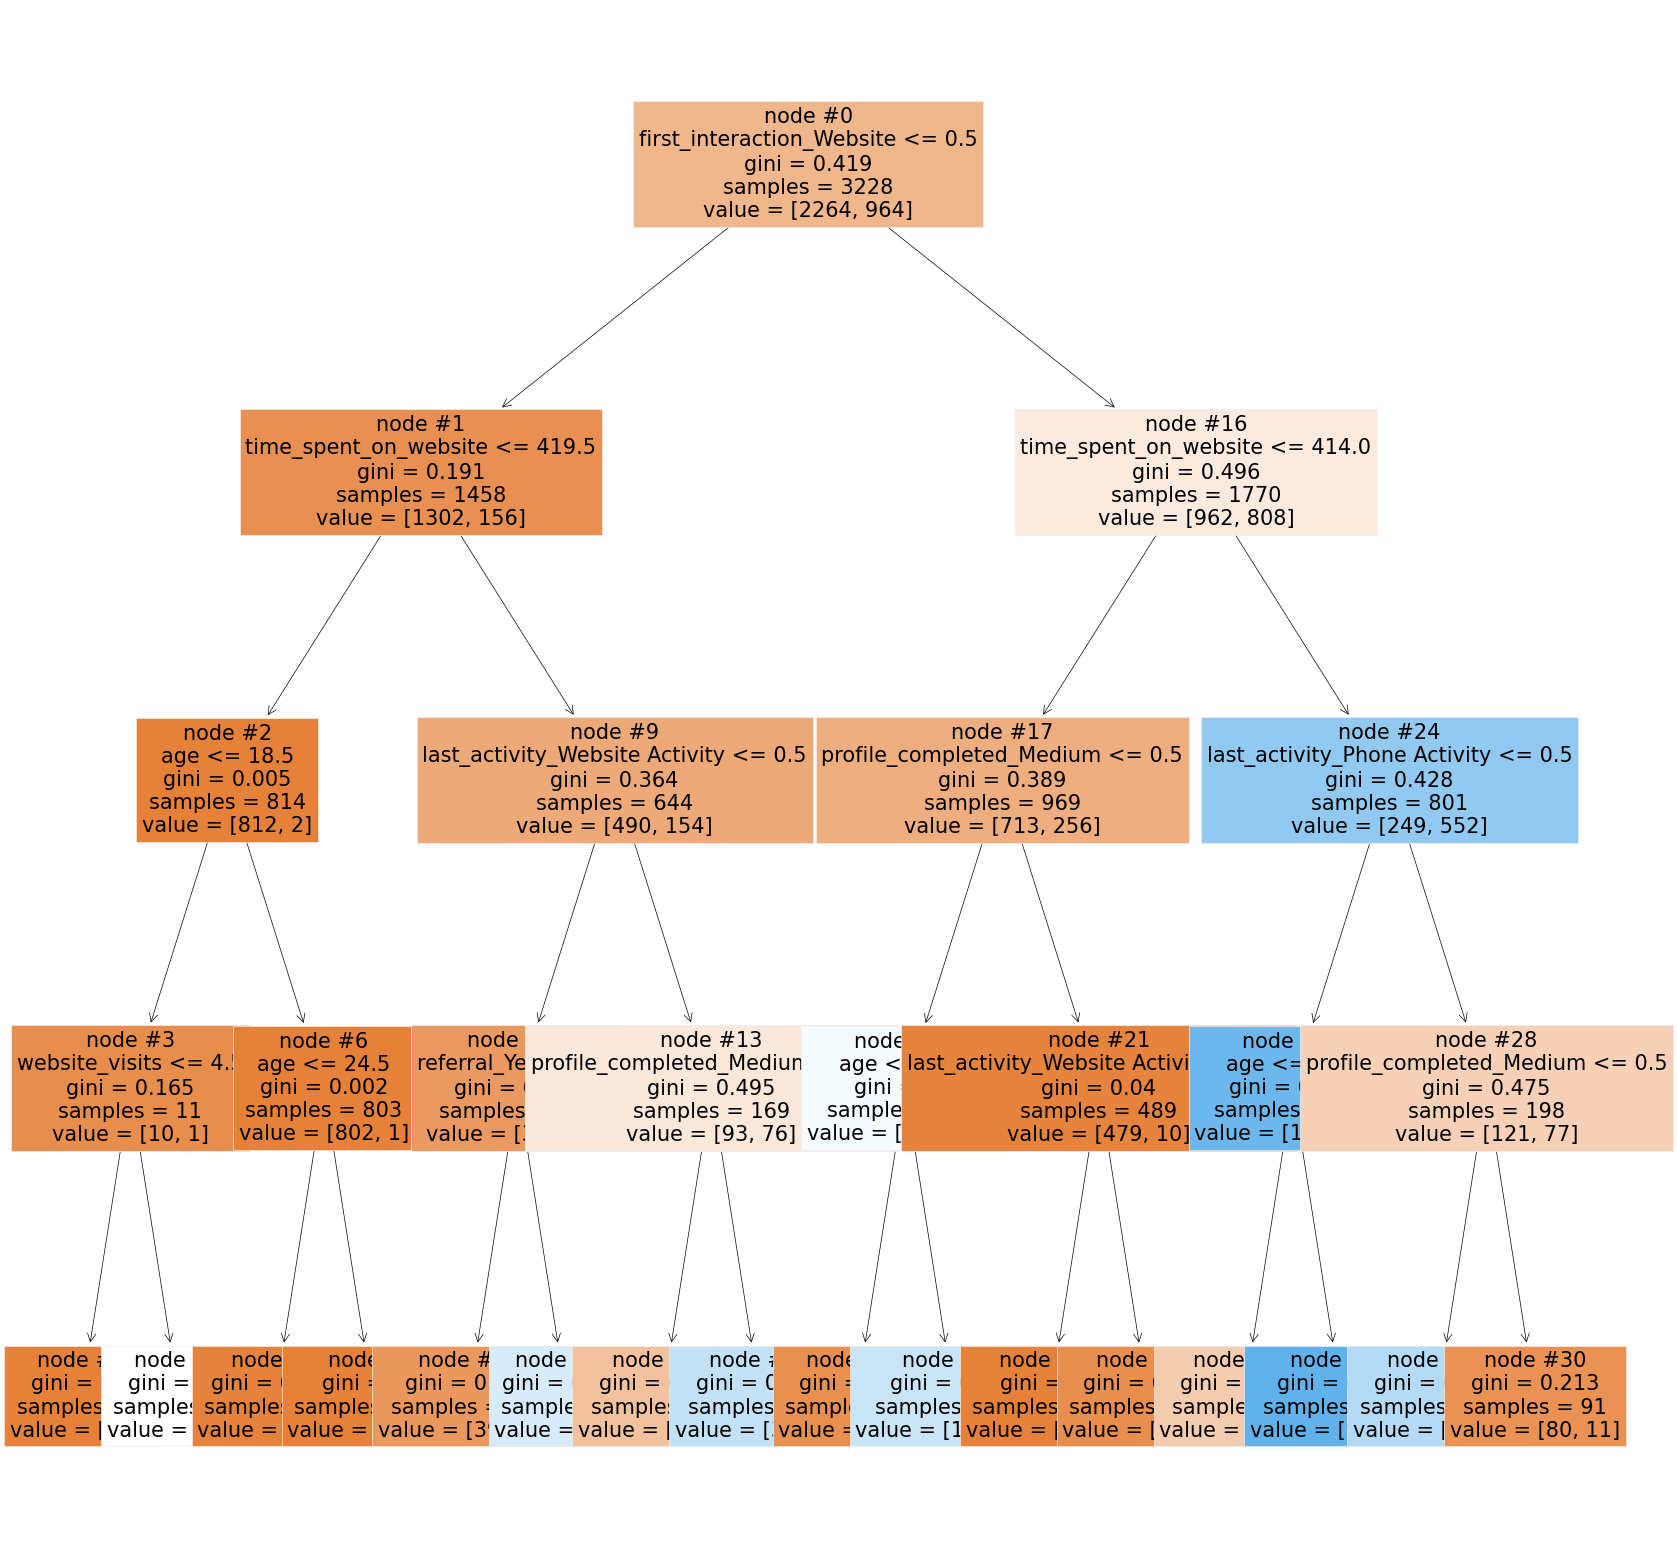

In [244]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt_classifier_visualize, feature_names= features, 
               filled=True, fontsize=15, node_ids=True);

<Axes: xlabel='Importance'>

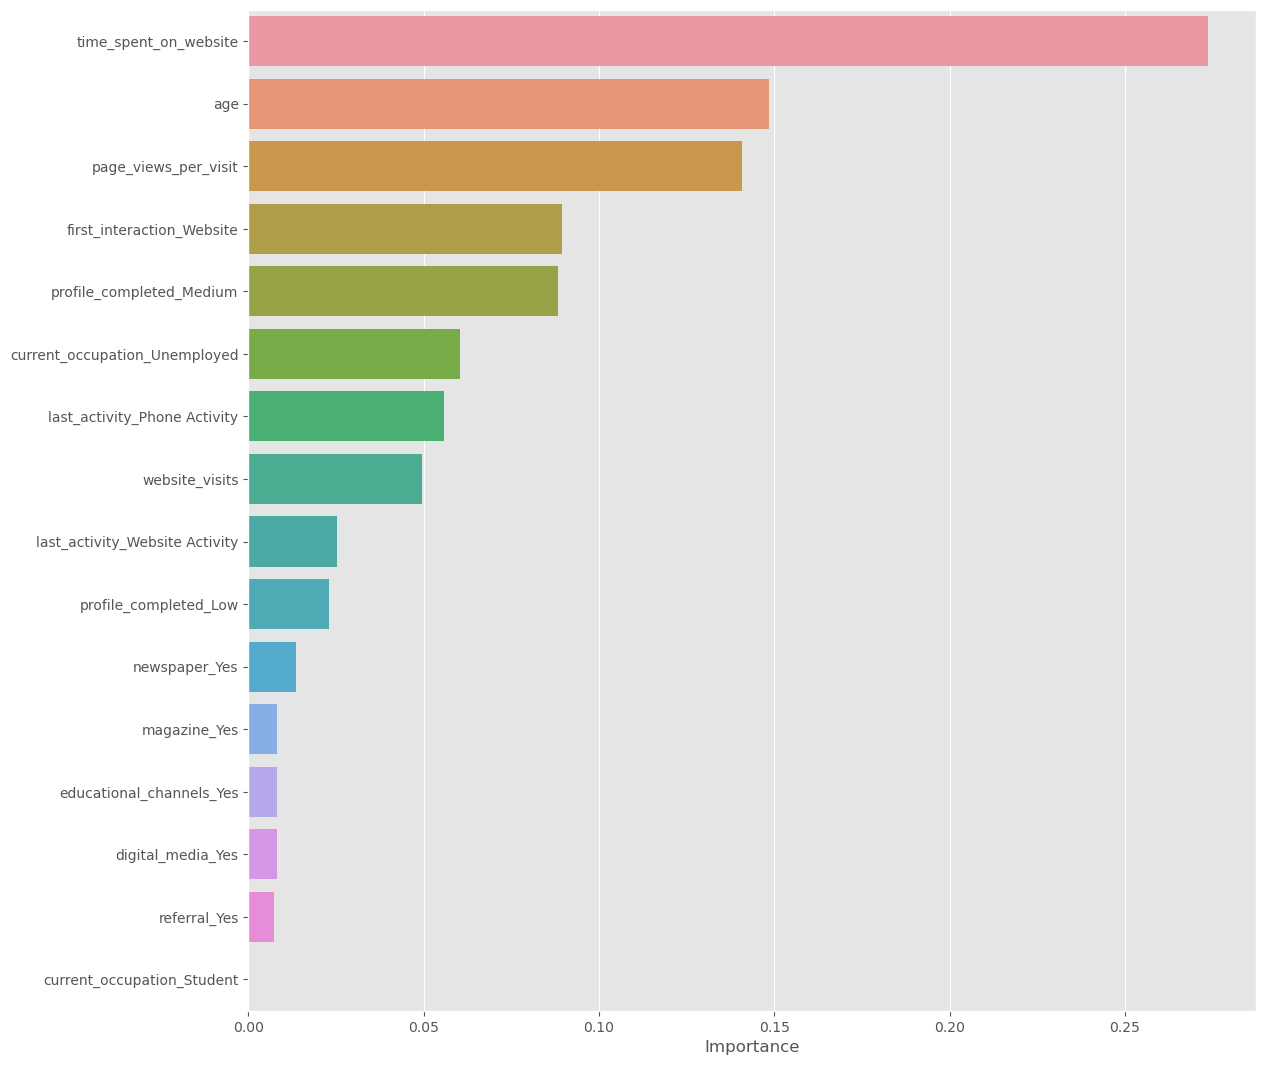

In [245]:
# Importance features 

importances = dt.feature_importances_
columns = features
importance_df = pd.DataFrame(importances, index=features, columns = ['Importance']).sort_values(by= 'Importance', ascending= False)
plt.figure(figsize= (13,13))
sns.barplot(x=importance_df.Importance, y=importance_df.index)

**Observation:**

- According to the Decision Tree, time spent on the website is the most important feature, followed by age, page view per visit and if the first interaction was in the website. 
- This might mean that leads are more likely to convert to paid user the more time they spend on the website, their first interaction was on the website and are in certain range of age.

# Using GridSearch for Hyperparameter Tuning

In [246]:
dtree_estimator = DecisionTreeClassifier(class_weight = {0:0.7, 1:0.3},random_state=1)

parameters = { 
    'max_depth': np.arange(2,7),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf':[5,10,20,25]
}

scorer = metrics.make_scorer(recall_score, pos_label = 1)

#scorer = metrics.make_scorer(f1_score, average='weighted')

gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv=10)

gridCV = gridCV.fit(x_train,y_train)

dtree_estimator = gridCV.best_estimator_

dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.3}, criterion='entropy',
                       max_depth=6, min_samples_leaf=10, random_state=1)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2264
           1       0.92      0.47      0.62       964

    accuracy                           0.83      3228
   macro avg       0.86      0.73      0.76      3228
weighted avg       0.84      0.83      0.81      3228



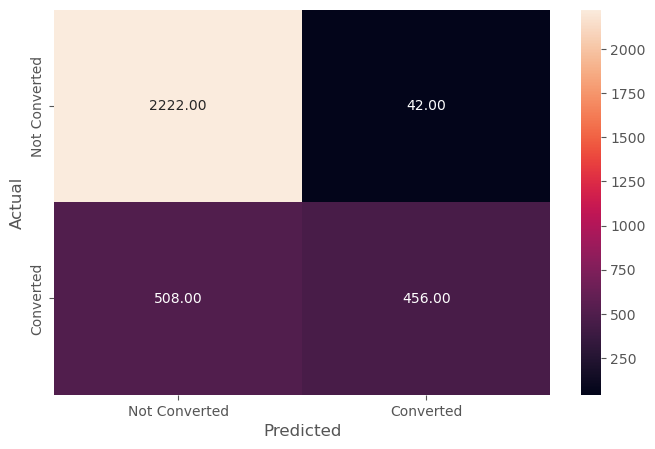

In [247]:
y_train_pred_dt_estimator = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt_estimator)

**Observation:**

- In comparison to the model with default values of hyperparameters, the performance on the training set has gone down. This makes sense because we are trying to reduce overfitting.

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       971
           1       0.88      0.41      0.56       413

    accuracy                           0.81      1384
   macro avg       0.84      0.70      0.72      1384
weighted avg       0.82      0.81      0.78      1384



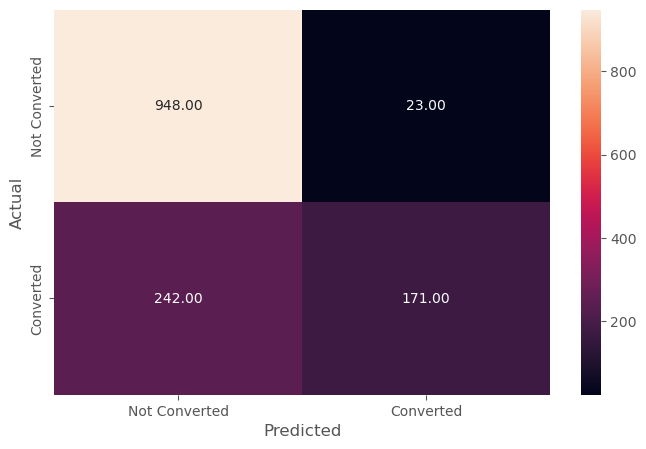

In [248]:
y_test_pred_dt_estimator = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt_estimator)

In [249]:
dtree_tuned_test = model_performance_classification(dtree_estimator, x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.839041,0.695178,0.808526


**Observation:**

- The tuned model has improved its performance compared to the model with default values of hyperparameters.
- The model does not seem to be overfitting the data and its showing similar performance on train and test datasets.

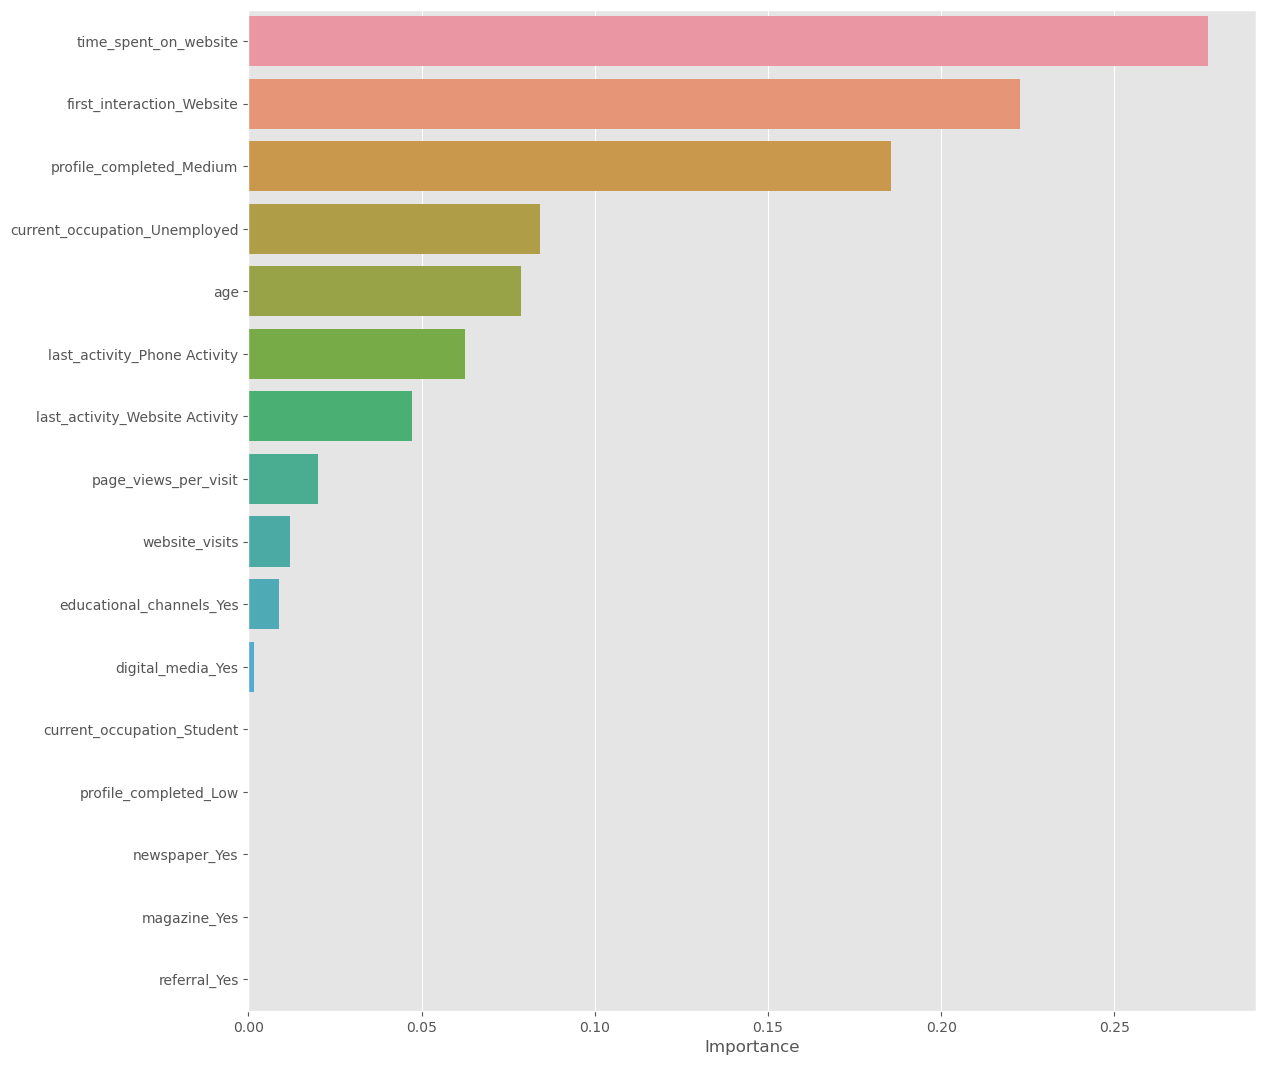

In [250]:
importances = dtree_estimator.feature_importances_

columns = features

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index);

**Observation:**

- After the tuning of the model we get few differences on the important features, age and page views per visit are no longer in the most importat features, we still get time spent on website and if its first interaction was on the website.

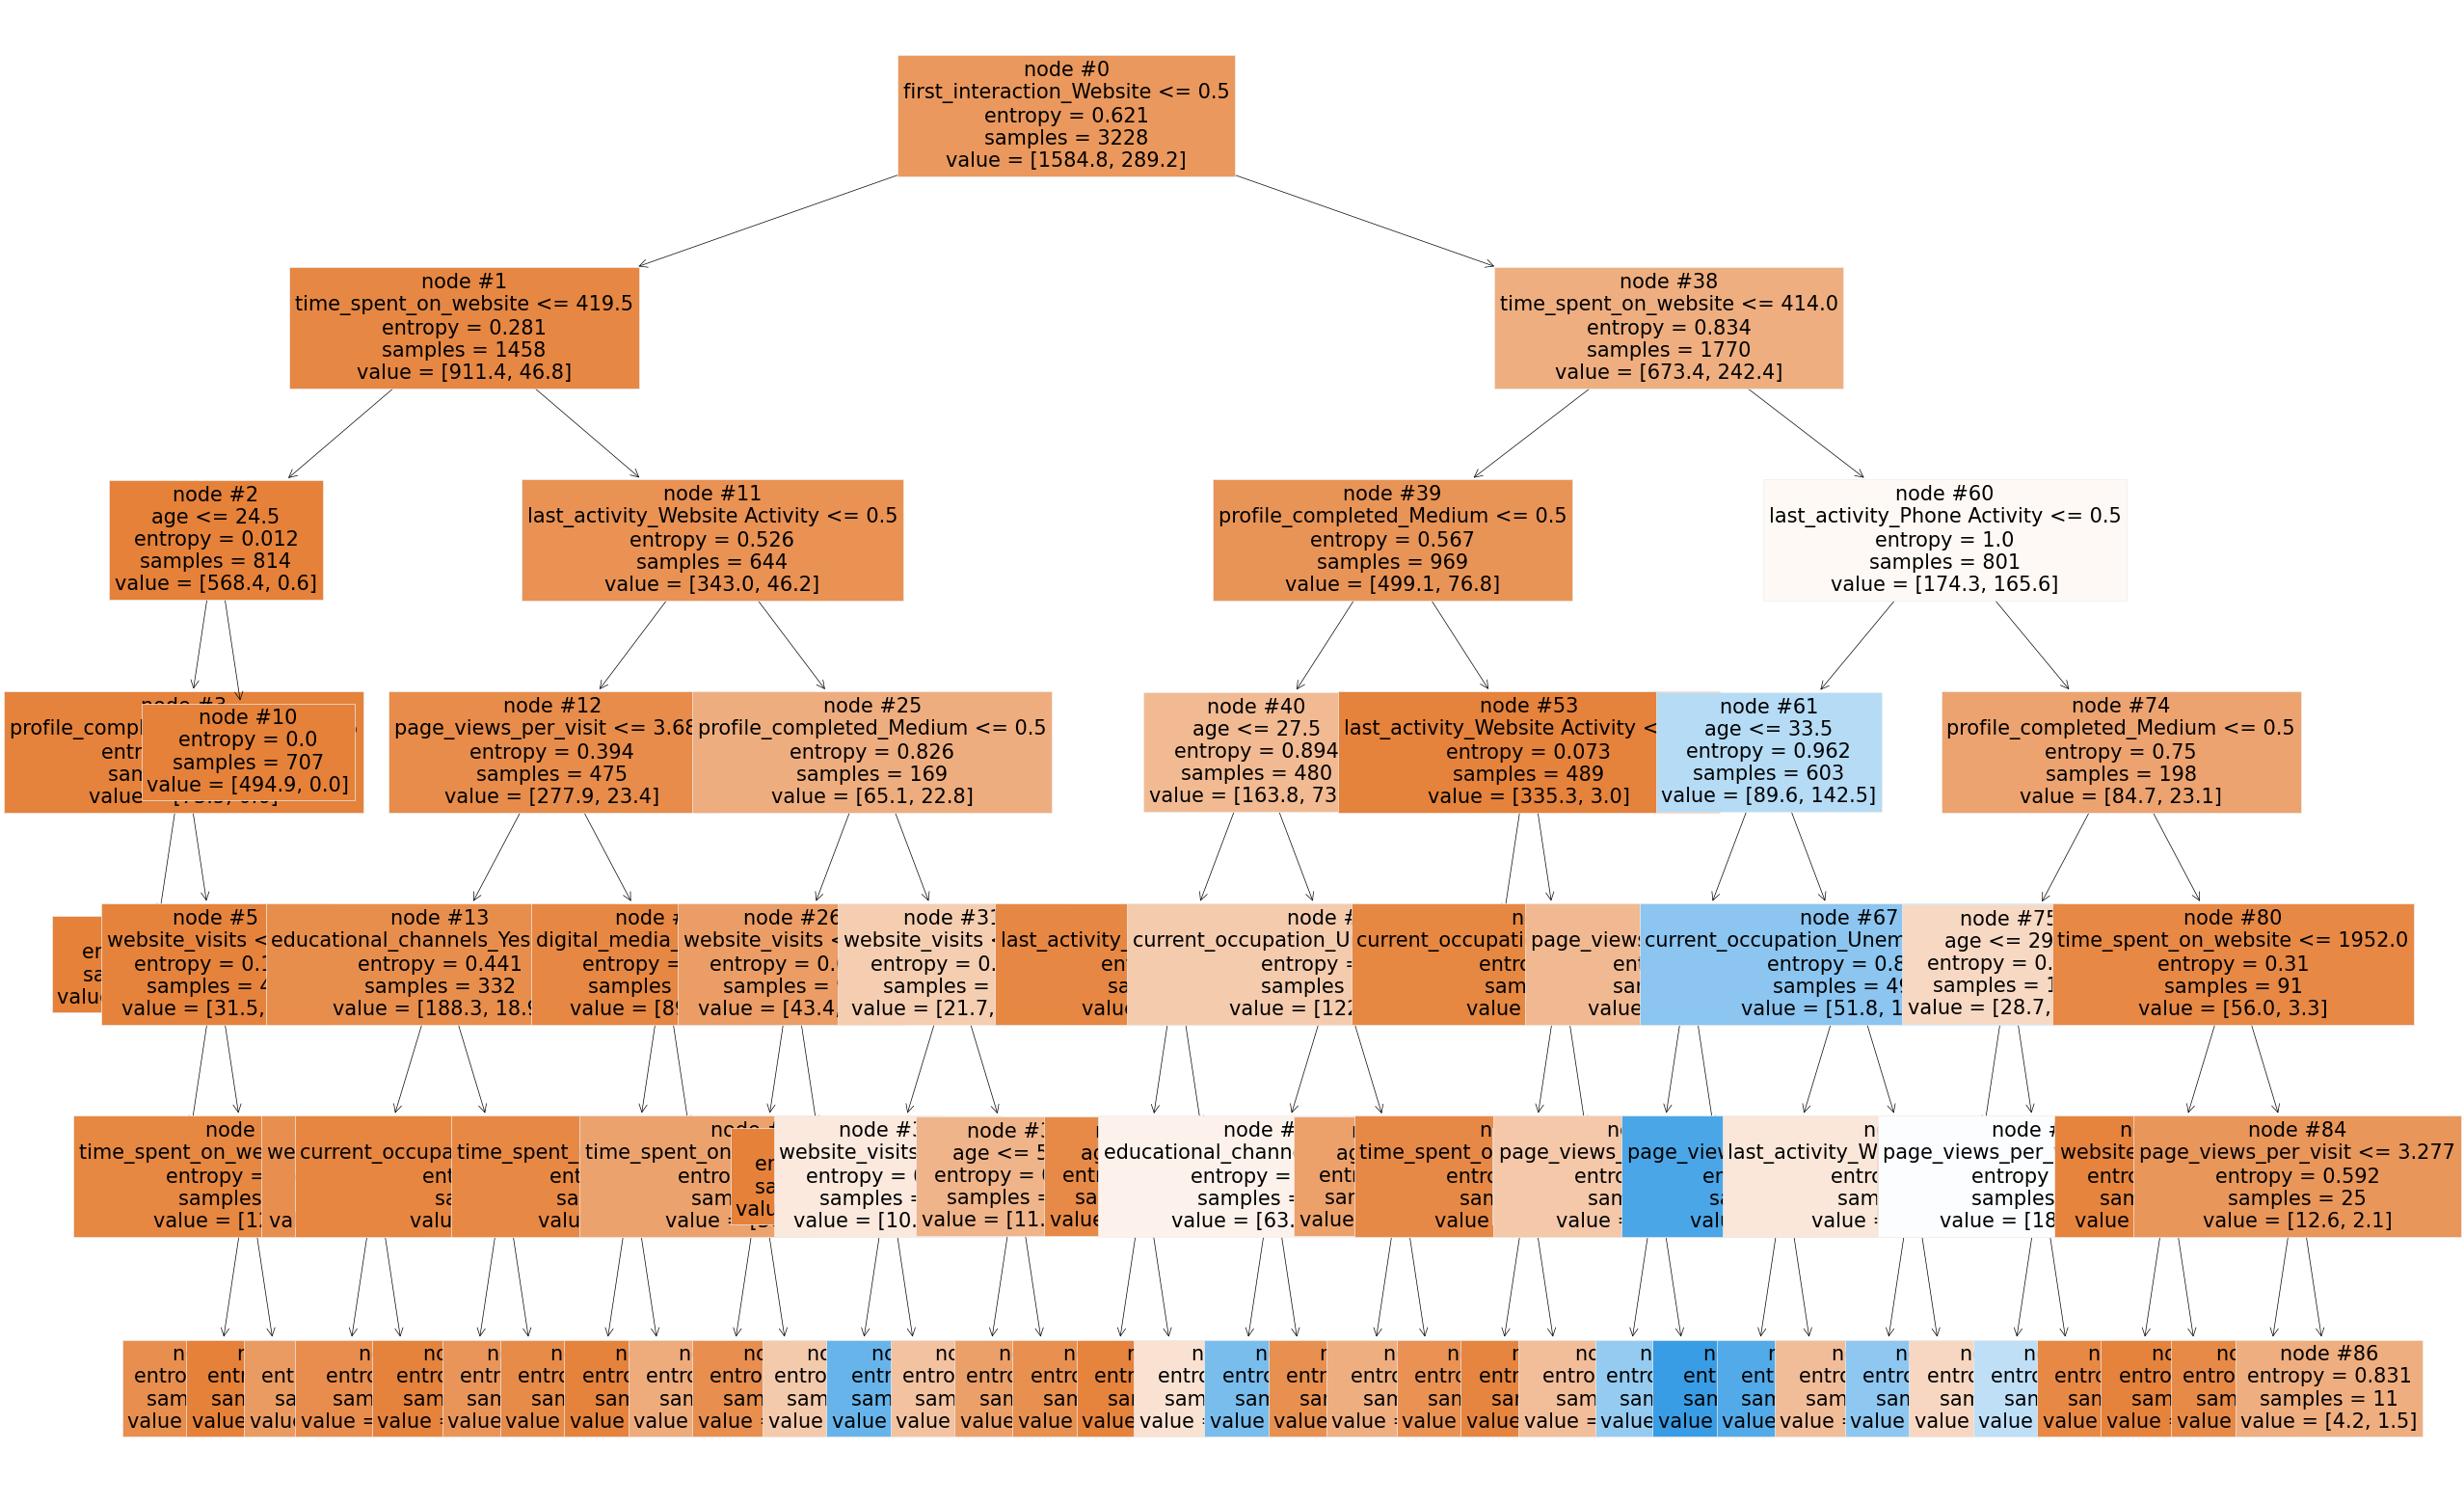

In [251]:
plt.figure(figsize=(30,20))
tree.plot_tree(dtree_estimator, feature_names= features, 
               filled=True, fontsize=15, node_ids=True);

## Building a Random Forest model

In [252]:
rf_estimator = RandomForestClassifier(class_weight = {0:0.7, 1:0.3},random_state=1)
rf_estimator.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.7, 1: 0.3}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



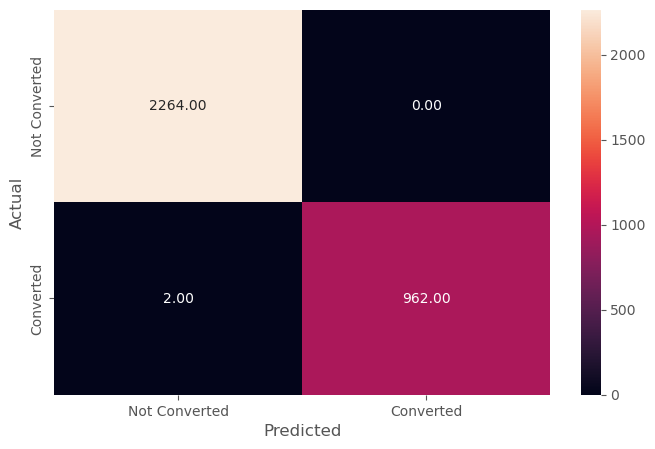

In [253]:
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.78      0.74      0.76       413

    accuracy                           0.86      1384
   macro avg       0.83      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



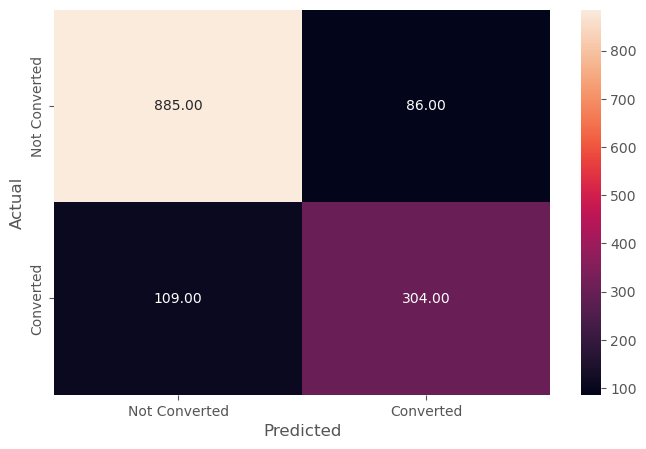

In [254]:
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**

- The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 1, while the recall on the test data is only ~ 0.74 for class 1.
- The Random Forest classifier is having a better performance than the tuned decision tree.

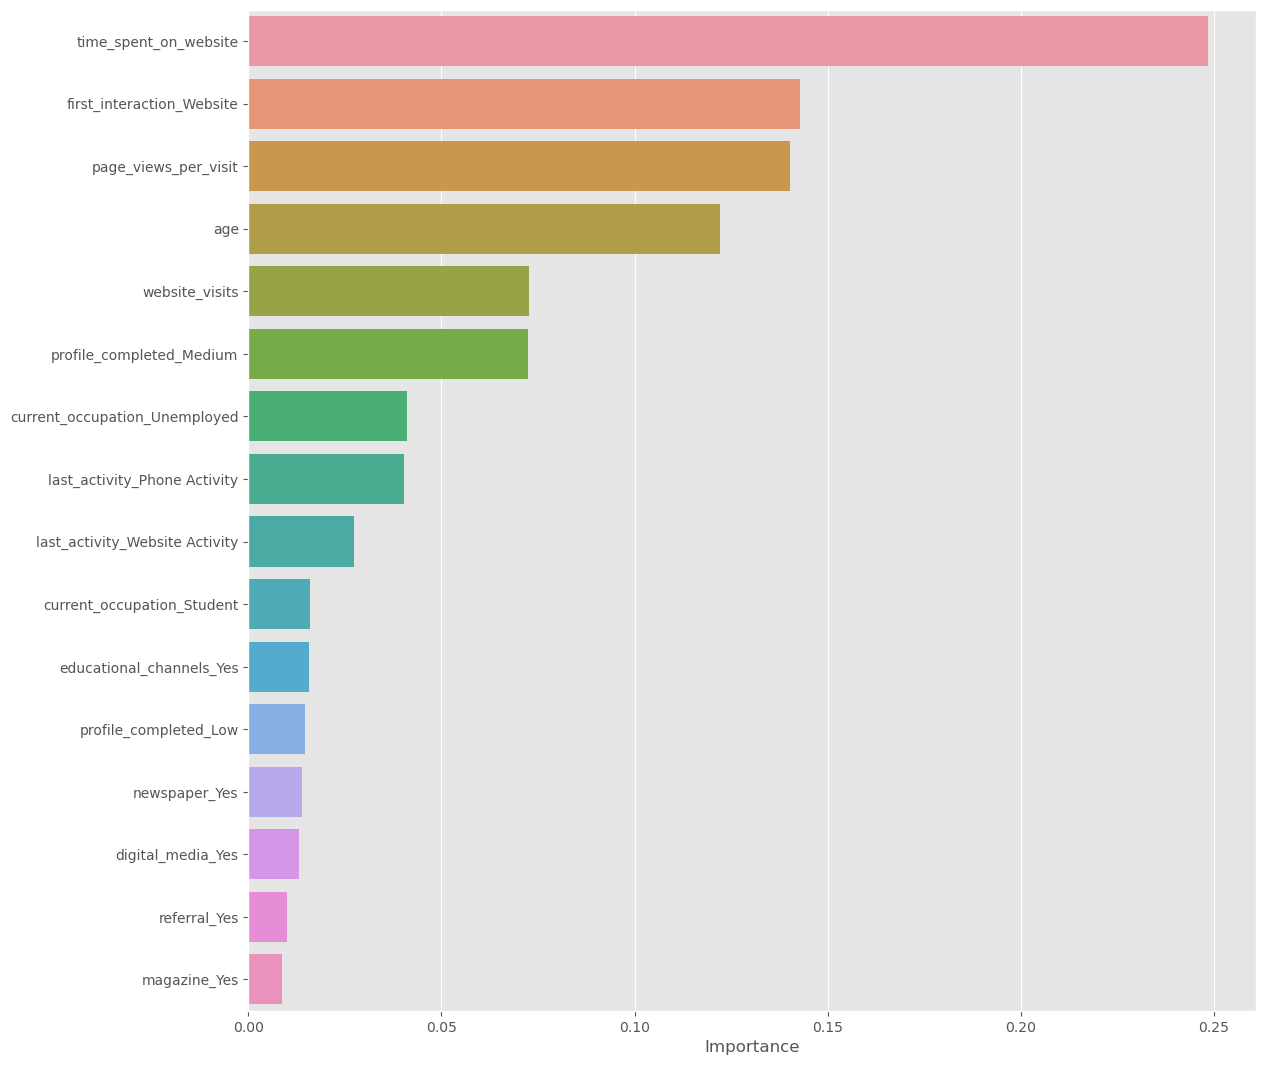

In [255]:
importances = rf_estimator.feature_importances_

columns = features

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index);

**Observations:**

- The most repeated features on both models are time spent on website and the website as a the first interaction.

## Model Performance evaluation and improvement

In [256]:
rf_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_test

,Precision,Recall,Accuracy
0,0.834915,0.823754,0.859104


## Tuning the Random Forest Classifier

In [257]:
rf_estimator_tuned = RandomForestClassifier(class_weight = {0:0.7, 1:0.3},random_state=1)

parameters_rf = {
    'n_estimators':[100,250,500],
    'min_samples_leaf': np.arange(1,4,1),
    'max_features':[0.7,0.9,'auto']
}

scorer = metrics.make_scorer(recall_score, pos_label = 1)

#scorer = metrics.make_scorer(f1_score, average='weighted')

grid_obj = GridSearchCV(rf_estimator_tuned, parameters_rf, scoring = scorer, cv=5)

grid_obj = grid_obj.fit(x_train,y_train)

rf_estimator_tuned = grid_obj.best_estimator_

In [258]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.7, 1: 0.3}, max_features=0.7,
                       n_estimators=250, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



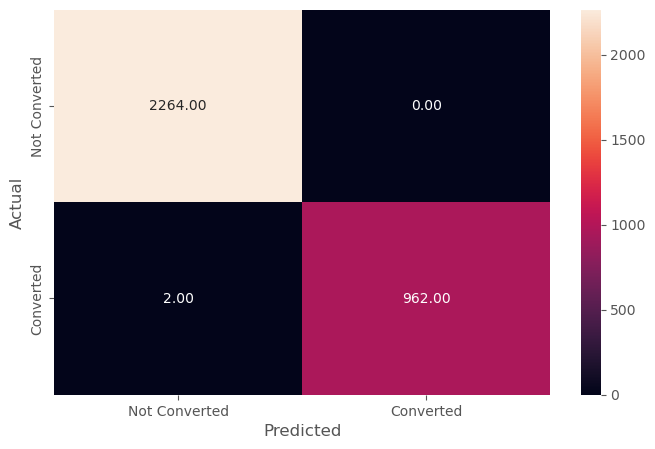

In [259]:
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)
metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       971
           1       0.75      0.74      0.74       413

    accuracy                           0.85      1384
   macro avg       0.82      0.82      0.82      1384
weighted avg       0.85      0.85      0.85      1384



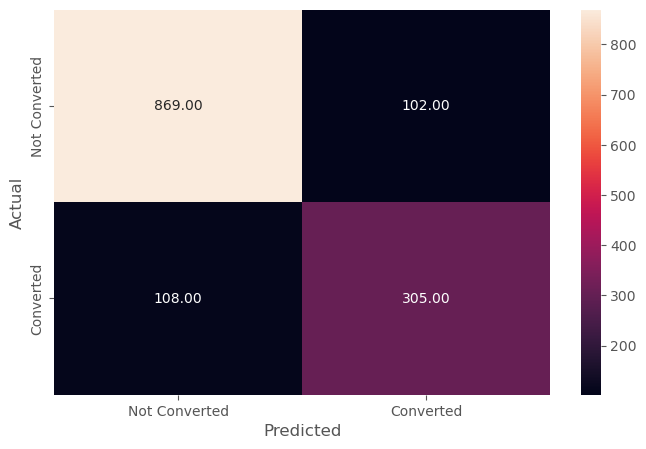

In [260]:
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)
metrics_score(y_test, y_pred_test_rf_tuned)

In [261]:
rf_tuned_test = model_performance_classification(rf_estimator_tuned, x_test,y_test)
rf_tuned_test

,Precision,Recall,Accuracy
0,0.819422,0.816726,0.848266


**Observations:**
- The model seems to be overfitting on the training data as well, is having a good performance as well compared to the decision tree.  

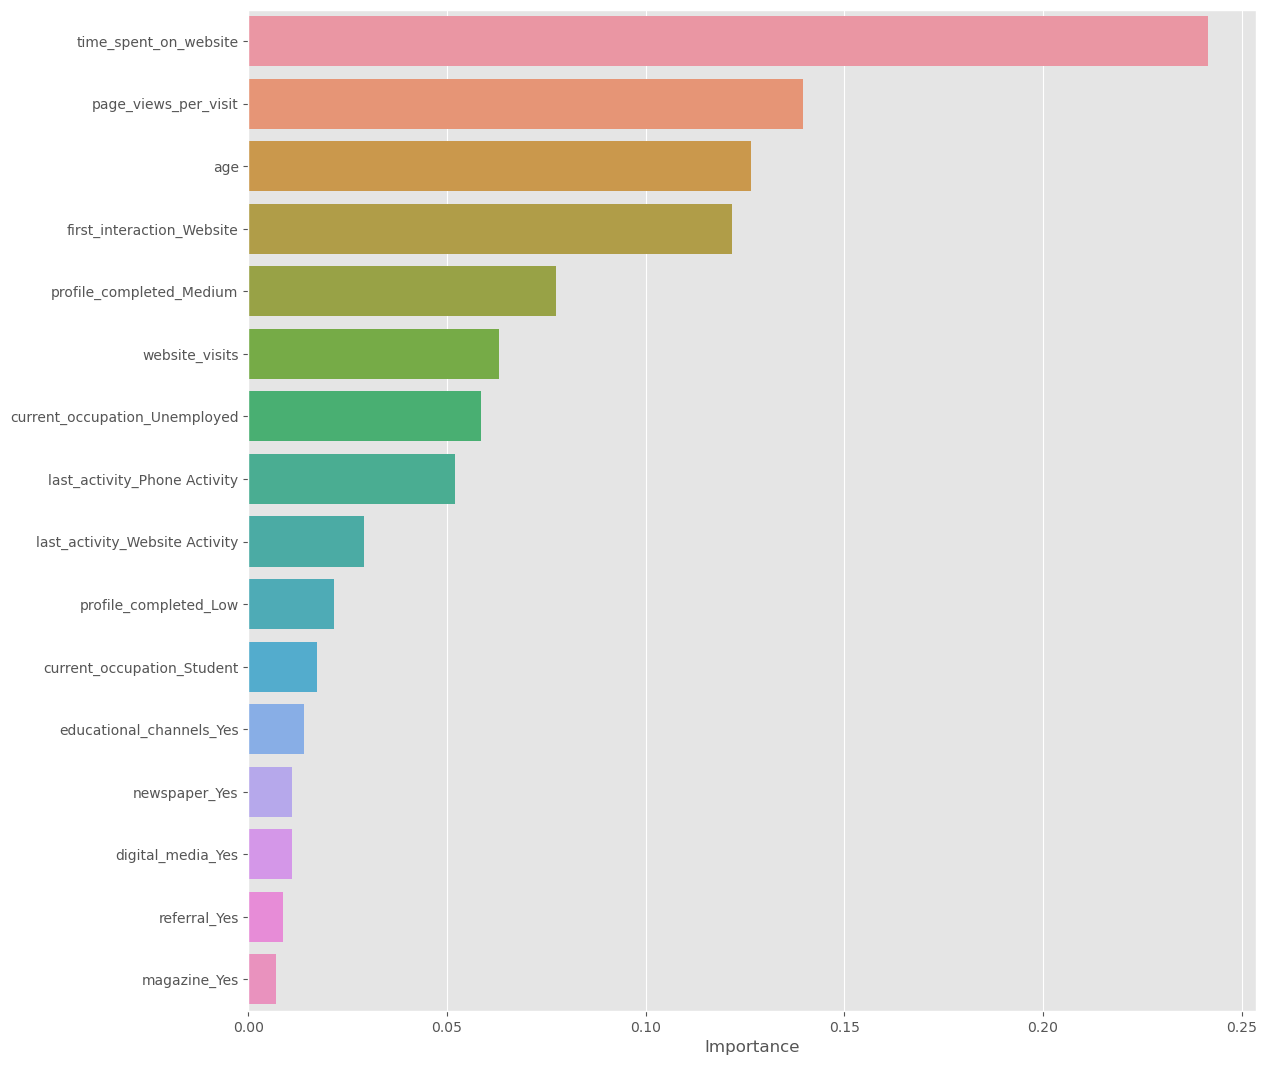

In [262]:
importances = rf_estimator_tuned.feature_importances_

columns = features

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index);

In [263]:
models_test_comp_df = pd.concat(

    [
    dtree_test.T, dtree_tuned_test.T,rf_test.T,
    rf_tuned_test.T
    ],

    axis = 1,
)
models_test_comp_df.columns = [
    "Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Tuned Random Forest classifier",
]


# Test performance comparison:

In [264]:
models_test_comp_df 

,Decision Tree classifier,Tuned Decision Tree classifier,Random Forest classifier,Tuned Random Forest classifier
Precision,0.757527,0.839041,0.834915,0.819422
Recall,0.762077,0.695178,0.823754,0.816726
Accuracy,0.796965,0.808526,0.859104,0.848266


**Observations:** 
- The best performing model is the Random Forest Classifier an its tuned version. 

## Actionable Insights and Recommendations

- Our analysis has shown that the duration of time that a potential customer spends on the company's website plays a crucial role in increasing conversions. Therefore, it is absolutely essential for the company to actively encourage users to invest more valuable time exploring the various aspects of the website.
- The website itself serves as the initial impression of the company's product, making it of high importance. The company should prioritize allocating resources to attract a larger customer base to engage with the website rather than focusing solely on the mobile app. This is because leads tend to perceive a greater sense of commitment and credibility when interacting with the website.
- Furthermore, it has been identified that the number of page views per visit significantly impacts conversion rates. To enhance users' engagement and familiarity with the product, we recommend conducting tests on multiple landing pages. This will allow for a better understanding of which pages are most effective in capturing users' attention and encouraging them to explore further.
- In addition to the aforementioned factors, age also plays a vital role and should not be disregarded. It is imperative to develop distinct approaches tailored to different age groups. By implementing a more refined segmentation strategy based on these age groups, the company can effectively cater to the specific needs and preferences of each demographic.